In [22]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import PIL.Image as Image

In [3]:
data =np.loadtxt('../datasets/mnist/mnist_train.csv', delimiter=',', dtype=int)


In [8]:
data.shape

(60000, 785)

In [4]:
# 1ta ustunni yuklash y_trainga
y_train = data[:, 0]
X_train = data[:, 1:]

0
  
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 252 252 252 253 252 252  96 189 253 1

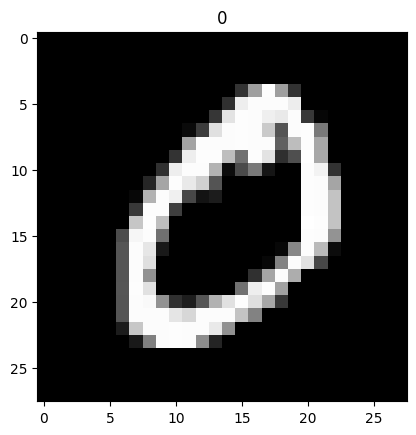

In [5]:
idx = 1
plt.title(y_train[idx])
print(y_train[idx])

plt.imshow(np.reshape(X_train[idx], (28,28)), cmap='gray')
print('  ')
print(X_train[idx])

In [8]:
n_train, n_f = X_train.shape
print(n_train)
print(n_f)


60000
784


In [ ]:
#   modelda nechta 0 va 1 borligini topish

X01_train = X_train[np.logical_or(y_train==0, y_train==1)]
y01_train = y_train[np.logical_or(y_train==0, y_train==1)]
n_train01 = X01_train.shape[0]
n_train01

12665

In [12]:
w = np.zeros(n_f)
for i in range(10):
    for j in range(n_train01):
        f = np.sum(w*X01_train[j])

        if y01_train[j] == 1 and f<=0:
            w = w + X01_train[j]
        elif y01_train[j] == 0 and f>0:
            w = w - X01_train[j]


In [14]:
n = 0
for j in range(n_train01):
    f = np.sum(w*X01_train[j])
    if y01_train[j] == 1 and f > 0:
        n+=1
    elif y01_train[j] == 1 and f <= 0:
        n+=1

print("aniqlik:", n/n_train01)

aniqlik: 0.5323332017370707


In [15]:
data =np.loadtxt('../datasets/mnist/mnist_test.csv', delimiter=',', dtype=int)
# 1ta ustunni yuklash y_trainga
y_test = data[:, 0]
X_test = data[:, 1:]
n_test = X_test.shape[0]
n_test


10000

In [16]:
#   modelda nechta 0 va 1 borligini topish

X01_test = X_test[np.logical_or(y_test==0, y_test==1)]
y01_test = y_test[np.logical_or(y_test==0, y_test==1)]
n_test01 = X01_test.shape[0]
n_test01

2115

In [17]:
n = 0
for j in range(n_test01):
    f = np.sum(w*X01_test[j])
    if y01_test[j] == 1 and f > 0:
        n+=1
    elif y01_test[j] == 1 and f <= 0:
        n+=1

print("aniqlik:", n/n_test01)

aniqlik: 0.5366430260047281


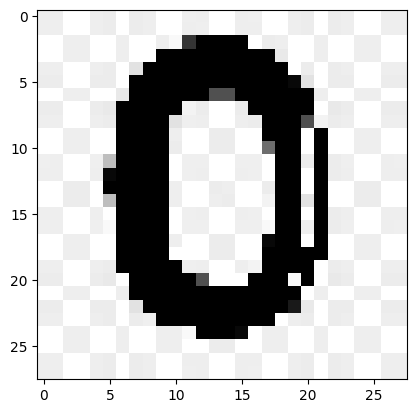

In [34]:
img = Image.open('../datasets/0_test1.png')
img = img.resize((28,28))
# vek = np.array(img)[:, :,3]
plt.imshow(img, cmap='gray')

In [26]:
vek = np.array(img)
vek.shape

(28, 28)

In [27]:
vek_float = vek.reshape (784, )
f = np.sum(w * vek_float)
f

258941.0